# Compare logs

In [1]:
import pandas as pd
import altair as alt
import numpy as np
alt.renderers.enable('notebook') # show and interact ith plots in jupyter notebook
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')
import seaborn as sns
import scipy.stats as stats


In [28]:
df_post = pd.read_csv('../logs/walk_stats.postclustering.csv', index_col=False)
df_pre = pd.read_csv('../logs/walk_stats.preclustering.csv', index_col=False)
df_pre['round'] = 'unclustered'
df_post['round'] = 'clustered'

df_prev = pd.read_csv('../logs/walk_stats.pre_vectorize.csv', index_col=False)
df_postv = pd.read_csv('../logs/walk_stats.postclustering.csv', index_col=False)
df_prev['round'] = 'unclustered'
df_postv['round'] = 'clustered'

In [3]:
df_pre.head()


,sim_method,optimzer,max_dist_hr,starting_lat,starting_long,duration,num_points,total_dist,avg_dist,max_dist,stop_order,num_art_stops,num_building_stops,num_plaque_stops,stop_ids,mean_similarity,max_similarity,user_profile,user_prefs,round
0,spatial,or,500,43.647273,-79.38656,1,12,2771,230.916667,0,0-6-11-13-9-10-8-2-3-7-12-1-4-5,0,0,13,[1549 1879 1906 4765 1612 1539 6568 2185 1540...,1.0,1.0,1,simplified prefs,unclustered
1,spatial,or,500,43.647273,-79.38656,1,12,2305,192.083333,0,0-4-13-12-11-9-10-8-7-2-3-1-6-5,0,13,0,[4961 3543 3544 3545 3547 3546 3639 3741 5373...,1.0,1.0,2,simplified prefs,unclustered
2,spatial,or,500,43.647273,-79.38656,1,12,2960,246.666667,0,0-13-12-10-3-1-4-11-9-2-8-7-5-6,0,11,2,[4750 4803 5151 4655 4576 4582 4808 5258 4668...,1.0,1.0,3,simplified prefs,unclustered
3,spatial,or,1000,43.647273,-79.38656,1,12,5758,479.833333,0,0-10-6-3-2-1-12-5-8-11-4-13-9-7,0,0,13,[2185 6568 2074 2075 2080 1674 6537 6522 2206...,1.0,1.0,1,simplified prefs,unclustered
4,spatial,or,1000,43.647273,-79.38656,1,12,4830,402.500000,0,0-4-2-11-7-6-5-3-9-8-12-13-10-1,0,13,0,[3328 4187 5331 4091 4090 4089 4221 5376 5373...,1.0,1.0,2,simplified prefs,unclustered


In [4]:
df_pre.shape, df_post.shape

((48, 20), (48, 20))

In [5]:
df_merged =pd.concat([df_pre, df_post], axis=0)
df_merged.shape

(96, 20)

In [6]:
df_merged.columns

Index([' sim_method', ' optimzer', ' max_dist_hr', ' starting_lat',
       ' starting_long', ' duration', ' num_points', ' total_dist',
       ' avg_dist', 'max_dist', ' stop_order', ' num_art_stops',
       ' num_building_stops', ' num_plaque_stops', ' stop_ids',
       ' mean_similarity', ' max_similarity', ' user_profile', ' user_prefs',
       'round'],
      dtype='object')

In [7]:
#np.mean(df_pre[' total_dist'])

In [8]:
df_filter = df_merged.groupby([' user_profile',' starting_lat',' starting_long', ' sim_method',' max_dist_hr','round'])[' total_dist'].mean()
df_filter=df_filter.reset_index()
df_filter.head()

,user_profile,starting_lat,starting_long,sim_method,max_dist_hr,round,total_dist
0,1,43.647273,-79.38656,cosine_similarity,500,clustered,1103
1,1,43.647273,-79.38656,cosine_similarity,500,unclustered,2103
2,1,43.647273,-79.38656,cosine_similarity,1000,clustered,2785
3,1,43.647273,-79.38656,cosine_similarity,1000,unclustered,4449
4,1,43.647273,-79.38656,spatial,500,clustered,1995


In [9]:
df_filter.sort_values([' user_profile',' starting_lat',' starting_long', ' sim_method',' max_dist_hr','round'], inplace=True)
df1000=df_filter[df_filter[' max_dist_hr']==1000]

df1000.head()

,user_profile,starting_lat,starting_long,sim_method,max_dist_hr,round,total_dist
2,1,43.647273,-79.386560,cosine_similarity,1000,clustered,2785
3,1,43.647273,-79.386560,cosine_similarity,1000,unclustered,4449
6,1,43.647273,-79.386560,spatial,1000,clustered,3505
7,1,43.647273,-79.386560,spatial,1000,unclustered,5758
10,1,43.668697,-79.394173,cosine_similarity,1000,clustered,2178


In [14]:
clustered_distance_mean = df1000[df1000['round']=='clustered'][' total_dist'].mean()
unclustered_distance_mean=df1000[df1000['round']=='unclustered'][' total_dist'].mean()
clustered_distance_mean,unclustered_distance_mean

(3341.9166666666665, 4794.75)

In [16]:
a=df1000[df1000['round']=='clustered'][' total_dist'].values
b=df1000[df1000['round']=='unclustered'][' total_dist'].values

In [17]:
# p = df1000.pivot( columns='round', values=' total_dist')
# p

In [23]:
#df_filter['df_filter[' total_dist'].diff()
np.set_printoptions(suppress=True)

In [27]:
# Null hypothesis: adding clustering made no difference
# Altenrative: adding clustering reduced the total distance of the walk
# Student T Test
t_stat, p_value = stats.ttest_ind(a,b)
print(t_stat, format(p_value, '.8f')) 
# Rank Sum Test
#z_stat, p_val = stats.ranksums(df_merged['sat_participation'], df_merged['act_participation'])  
z_stat, p_val = stats.ranksums(  a,b )
print(z_stat,format(p_val, '.8f') )  

-5.53904373780722 0.00000141
-4.4847744124551285 0.00000730


* According to the T-Test: If the null hypothesis were true, we would only have a .00014% chance of observing this large a difference (-5.54) in route distances
* According to the MMW RankSumtest: If the null hypothesis were true, we would only have a .00073% chance of observing this large a difference (-4.485) in route distances

Either way, since this p value is significantly less than our threshold criteria of 5%, we can reject the null hypothesis and conclude that clustering statistically significantly reduced the walking distance

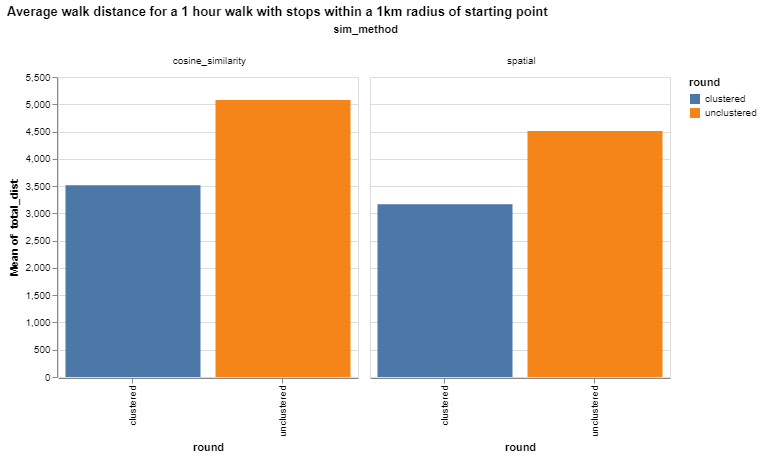

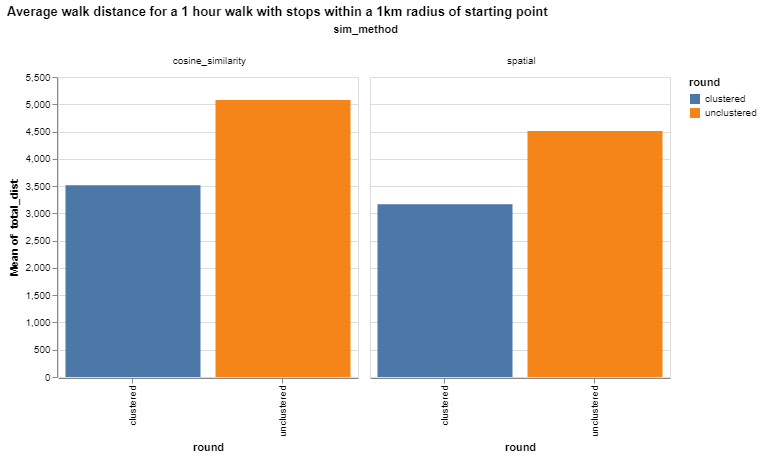

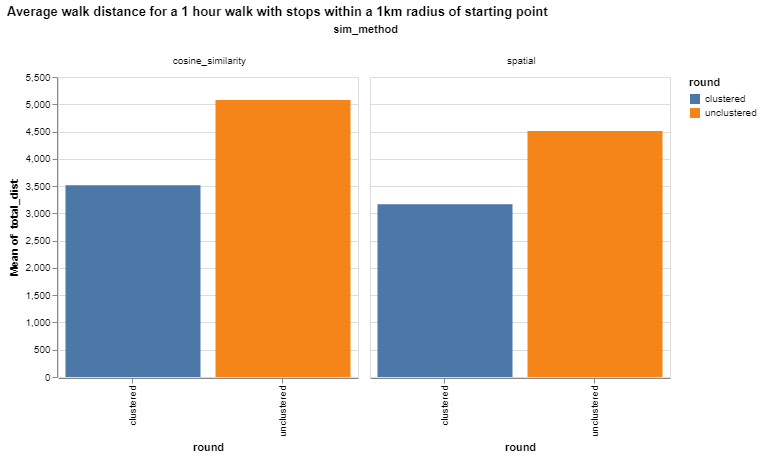

In [49]:
alt.Chart(df_merged[df_merged[' max_dist_hr']==1000], title="Average walk distance for a 1 hour walk with stops within a 1km radius of starting point").mark_bar().encode(
    x='round:N',
    y='mean( total_dist):Q',
    color='round:N',
    column=' sim_method:N'
).properties(
    width=300,
    height=300
)

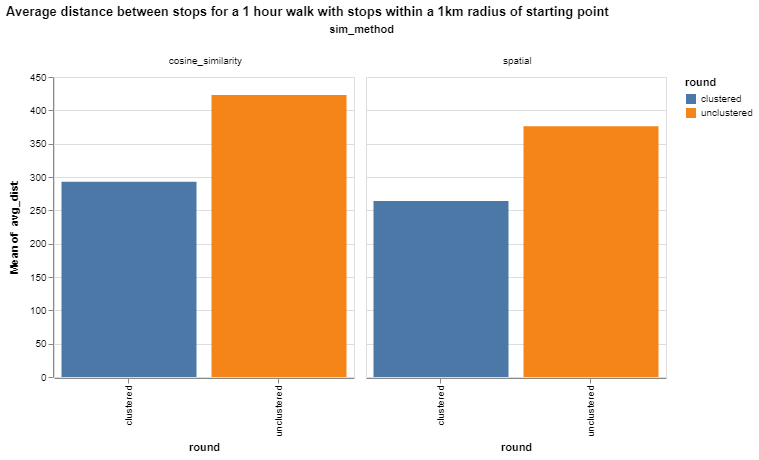

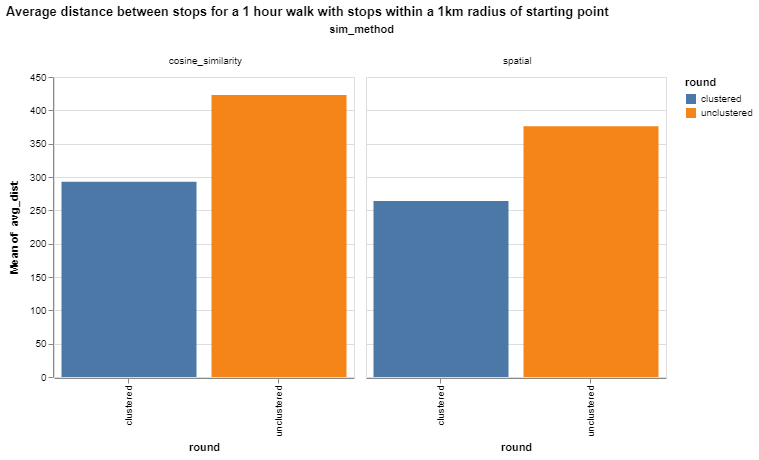

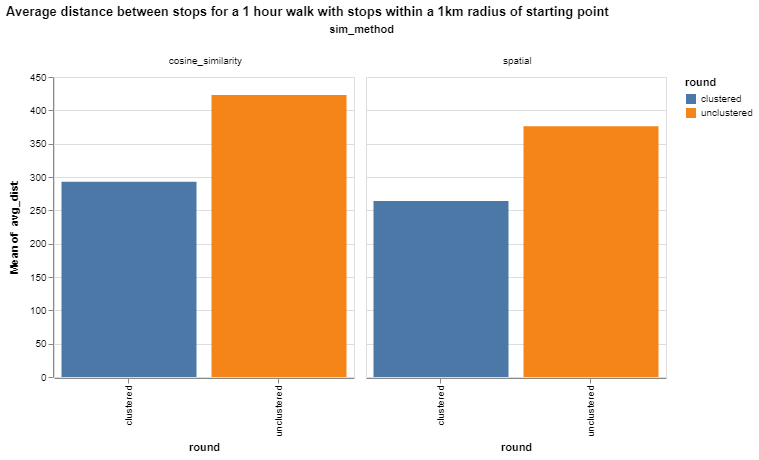

In [50]:
# avg_dist
alt.Chart(df_merged[df_merged[' max_dist_hr']==1000], title="Average distance between stops for a 1 hour walk with stops within a 1km radius of starting point").mark_bar().encode(
    x='round:N',
    y='mean( avg_dist):Q',
    color='round:N',
    column=' sim_method:N'
).properties(
    width=300,
    height=300
)

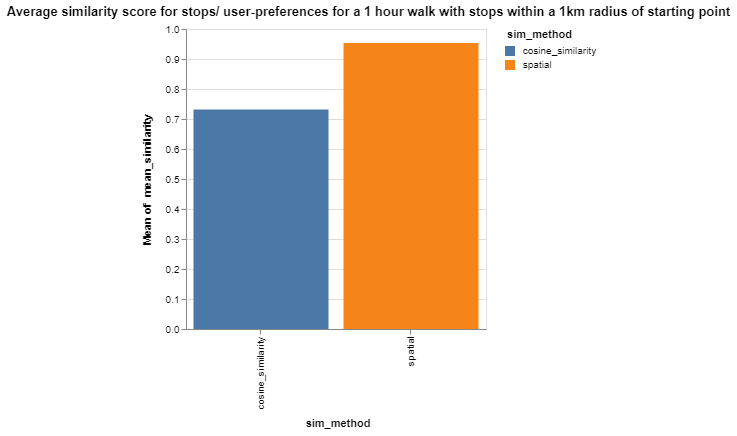

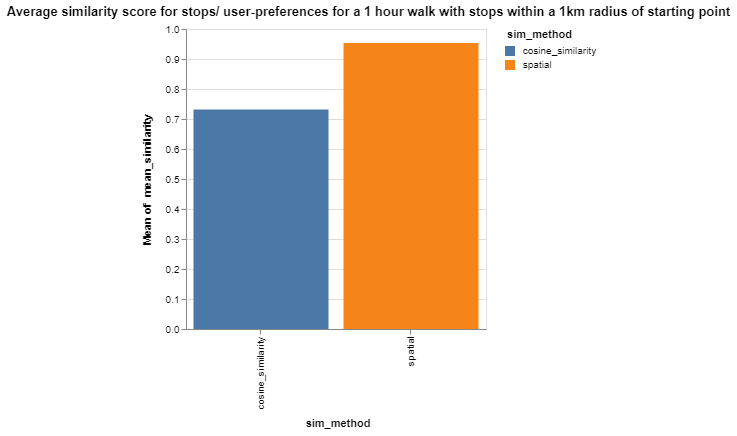

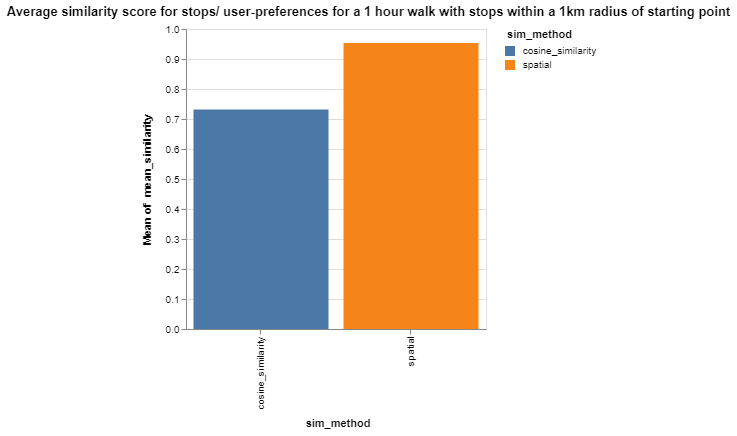

In [53]:

alt.Chart(df_merged[df_merged[' max_dist_hr']==1000], title="Average similarity score for stops/ user-preferences for a 1 hour walk with stops within a 1km radius of starting point").mark_bar().encode(
    x=' sim_method:N',
    y='mean( mean_similarity):Q',
    color=' sim_method:N'
).properties(
    width=300,
    height=300
)

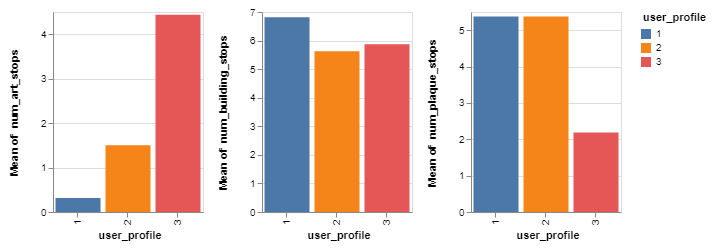

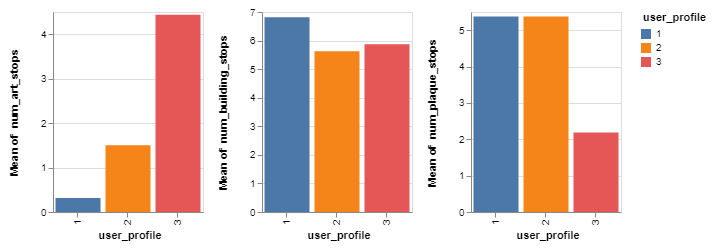

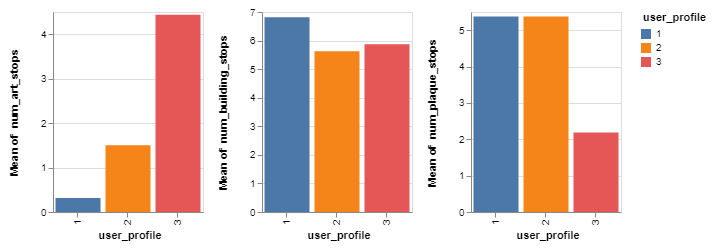

In [63]:
# ' num_art_stops',
#        ' num_building_stops', ' num_plaque_stops'
    
art = alt.Chart(df_merged[df_merged[' max_dist_hr']==1000]).mark_bar().encode(
    x=' user_profile:N',
    y='mean( num_art_stops):Q',
    color=' user_profile:N',
   # column=' sim_method:N'
).properties(
    width=150,
    height=200
)

bld = alt.Chart(df_merged[df_merged[' max_dist_hr']==1000]).mark_bar().encode(
    x=' user_profile:N',
    y='mean( num_building_stops):Q',
    color=' user_profile:N',
   # column=' sim_method:N'
).properties(
    width=150,
    height=200
)
plq = alt.Chart(df_merged[df_merged[' max_dist_hr']==1000]).mark_bar().encode(
    x=' user_profile:N',
    y='mean( num_plaque_stops):Q',
    color=' user_profile:N',
   # column=' sim_method:N'
).properties(
    width=150,
    height=200
)
art | bld | plq